# Pre-processing on Iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 

#Pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [2]:
%cd E:\ML1 datasets\DataSets

E:\ML1 datasets\DataSets


# Creating a Utils class to load the dataset and create train-test sets

In [63]:
class Utils:
    def load_dataset(self, filepath, testpercent):
        dataset = pd.read_csv(filepath)
        dataset.info()
        
        #Train Test Split 
        ds_train, ds_test = train_test_split(dataset, test_size= testpercent, random_state=0)
        return ds_train,ds_test
        
    #def load_dataset2(self, filepath, testpercent):
        #dataset2 = pd.read_excel(filepath)
        #dataset2.info()
        
        #Train Test Split 
        #ds_train2, ds_test2 = train_test_split(dataset2, test_size= testpercent, random_state=0)
        #return ds_train2,ds_test2
        
    #def load_dataset3(self, filepath, testpercent):
        #dataset3 = pd.read_json(filepath)
        #dataset3.info()
        
        #Train Test Split 
        #ds_train3, ds_test3 = train_test_split(dataset3, test_size= testpercent, random_state=0)
        #return ds_train3,ds_test3
    

In [64]:
myutils = Utils()

In [10]:
#trainset, testset= myutils.load_dataset3('iris.json',0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
#trainset, testset = myutils.load_dataset2('forestfires_excel.xlsx',0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  99 non-null     int64  
 1   X           99 non-null     int64  
 2   Y           99 non-null     int64  
 3   month       99 non-null     object 
 4   day         99 non-null     object 
 5   FFMC        99 non-null     float64
 6   DMC         99 non-null     float64
 7   DC          99 non-null     float64
 8   ISI         99 non-null     float64
 9   temp        99 non-null     float64
 10  RH          99 non-null     int64  
 11  wind        99 non-null     float64
 12  rain        99 non-null     int64  
 13  area        99 non-null     float64
dtypes: float64(7), int64(5), object(2)
memory usage: 11.0+ KB


In [65]:
dataset = pd.read_csv('iris.csv')
dataset

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,113.0,5.1,3.5,1.4,0.2,setosa
1,124.0,4.9,3.0,1.4,0.2,setosa
2,NaN,4.7,3.2,1.3,0.2,setosa
3,NaN,4.6,3.1,1.5,0.2,setosa
4,223.0,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,NaN,6.7,3.0,5.2,2.3,virginica
146,NaN,NaN,2.5,5.0,1.9,virginica
147,NaN,6.5,3.0,5.2,2.0,virginica
148,NaN,6.2,3.4,5.4,2.3,virginica


In [11]:
dataset.describe()

,id,sepal_length,sepal_width,petal_length,petal_width
count,46.000000,127.000000,150.000000,150.000000,150.000000
mean,168.304348,5.816535,3.054000,3.758667,1.198667
std,223.596350,0.845695,0.433594,1.764420,0.763161
min,4.000000,4.300000,2.000000,1.000000,0.100000
25%,45.000000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.700000,3.000000,4.350000,1.300000
75%,139.750000,6.450000,3.300000,5.100000,1.800000
max,865.000000,7.900000,4.400000,6.900000,2.500000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'sepal_length'}>],
       [<AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_length'}>],
       [<AxesSubplot:title={'center':'petal_width'}>, <AxesSubplot:>]],
      dtype=object)

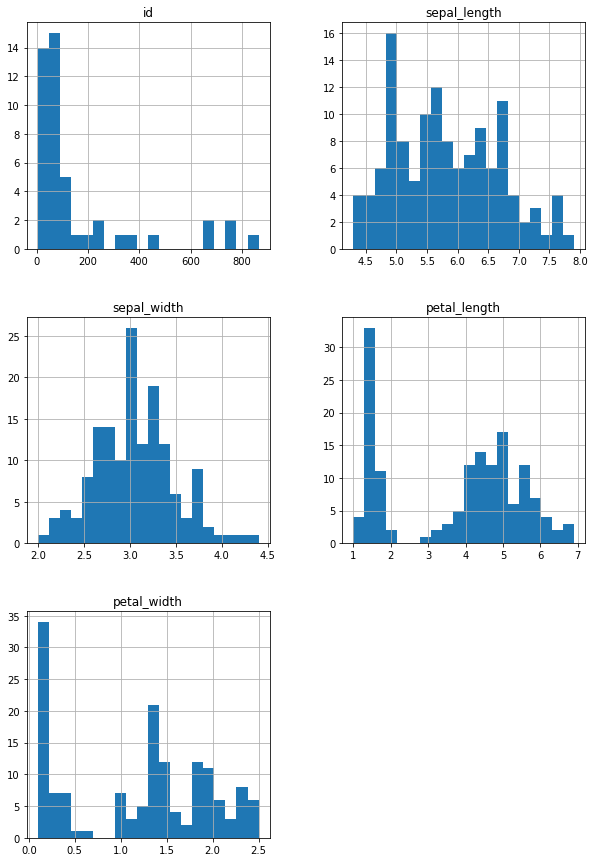

In [132]:
dataset.hist(bins=20,figsize=(10,15))

In [134]:
ds_corr_matrix = trainset.corr()

In [136]:
ds_corr_matrix

,id,sepal_length,sepal_width,petal_length,petal_width
id,1.000000,0.618916,0.020663,0.645866,0.664478
sepal_length,0.618916,1.000000,-0.043725,0.903723,0.847879
sepal_width,0.020663,-0.043725,1.000000,-0.343110,-0.301623
petal_length,0.645866,0.903723,-0.343110,1.000000,0.971129
petal_width,0.664478,0.847879,-0.301623,0.971129,1.000000


#### Attributes having Highest Correlation are petal_width and petal_length. Attributes having Lowest Correlation are id and sepal_width.

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

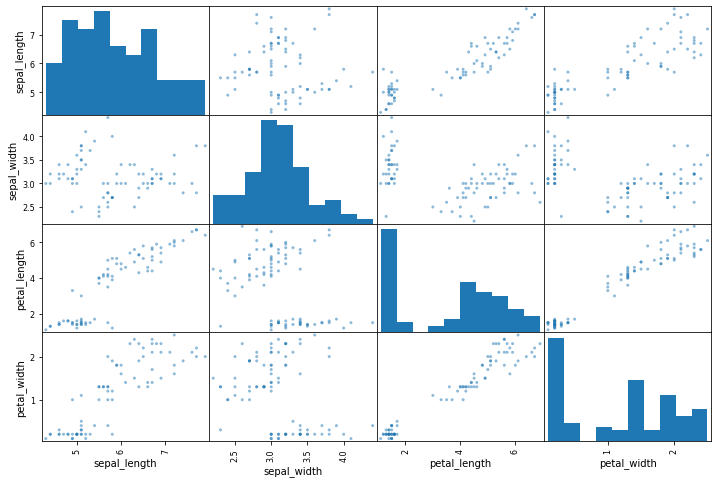

In [140]:
from pandas.plotting import scatter_matrix
attributes = ["sepal_length","sepal_width","petal_length", "petal_width"]
scatter_matrix(trainset[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

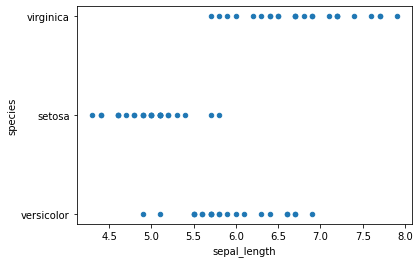

In [143]:
trainset.plot(kind="scatter", x="sepal_length", y="species")

#### Among the three species versicolor has sepal length between 5 to 7, setosa has between 4 to 6 and virginica has between 5.5 to 8 which is includes the highest sepal_length.

<AxesSubplot:xlabel='petal_width', ylabel='species'>

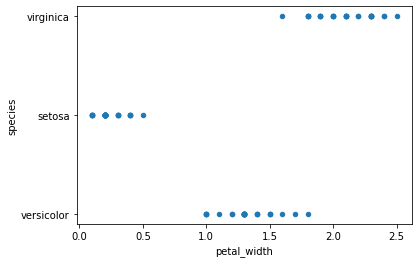

In [144]:
trainset.plot(kind="scatter", x="petal_width", y="species")

#### Among the three species versicolor has petal width between 1 to 1.8, setosa has between 0 to 0.5 and virginica has between 1.5 to 2.5 which is includes the highest sepal_length.

# Creating train-test sets

In [67]:
trainset, testset = myutils.load_dataset('iris.csv',0.4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            46 non-null     float64
 1   sepal_length  127 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [68]:
trainset.info()
testset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 85 to 47
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            31 non-null     float64
 1   sepal_length  76 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
 5   species       90 non-null     object 
dtypes: float64(5), object(1)
memory usage: 4.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 114 to 147
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            15 non-null     float64
 1   sepal_length  51 non-null     float64
 2   sepal_width   60 non-null     float64
 3   petal_length  60 non-null     float64
 4   petal_width   60 non-null     float64
 5   species       60 non-null     object 
dtypes: float64(5), object(1)
memory usage: 3.3+ KB


In [69]:
trainset.columns

Index(['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [70]:
trainset.shape

(90, 6)

In [71]:
testset.shape

(60, 6)

In [72]:
dataset["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [73]:
trainset.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
85,NaN,6.0,3.4,4.5,1.6,versicolor
30,45.0,4.8,3.1,1.6,0.2,setosa
101,NaN,5.8,2.7,5.1,1.9,virginica
94,NaN,5.6,2.7,4.2,1.3,versicolor
64,NaN,NaN,2.9,3.6,1.3,versicolor


In [74]:
X_train = trainset.drop("species", axis=1) 

In [75]:
X_train.head()

,id,sepal_length,sepal_width,petal_length,petal_width
85,NaN,6.0,3.4,4.5,1.6
30,45.0,4.8,3.1,1.6,0.2
101,NaN,5.8,2.7,5.1,1.9
94,NaN,5.6,2.7,4.2,1.3
64,NaN,NaN,2.9,3.6,1.3


In [76]:
y_train = trainset["species"].copy()

In [77]:
y_train.head()

85     versicolor
30         setosa
101     virginica
94     versicolor
64     versicolor
Name: species, dtype: object

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 85 to 47
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            31 non-null     float64
 1   sepal_length  76 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
dtypes: float64(5)
memory usage: 4.2 KB


# Data Cleaning

### Option 1:

   Remove tuples with null values

In [79]:
X_train_new = X_train.dropna(subset=["id"])

In [80]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 30 to 47
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            31 non-null     float64
 1   sepal_length  25 non-null     float64
 2   sepal_width   31 non-null     float64
 3   petal_length  31 non-null     float64
 4   petal_width   31 non-null     float64
dtypes: float64(5)
memory usage: 1.5 KB


### Option 2:

   Remove all columns with null values

In [ ]:
X_train_new_d = X_train.drop("species", axis=1)
X_train_new_d.info()

### Option 3:

   Transform each column separately using fillna()

In [81]:
X_train["id"].fillna(5, inplace=True)

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 85 to 47
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            90 non-null     float64
 1   sepal_length  76 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
dtypes: float64(5)
memory usage: 4.2 KB


In [83]:
X_train.loc[X_train['sepal_length'] == 4.6]

,id,sepal_length,sepal_width,petal_length,petal_width
3,5.0,4.6,3.1,1.5,0.2
6,33.0,4.6,3.4,1.4,0.3
47,98.0,4.6,3.2,1.4,0.2


### Option 4:

  Replace the null values with statistical mean/median/mode of the data in corresponding column
  Univariate Imputation imputes values in the i-th feature dimension using only non-missing values in that feature dimension
  Using SimpleImputer

In [85]:
imputer = SimpleImputer(strategy="median")
X_train_numeric = X_train

In [86]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 85 to 47
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            90 non-null     float64
 1   sepal_length  76 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
dtypes: float64(5)
memory usage: 4.2 KB


In [87]:
imputer.fit(X_train_numeric)

SimpleImputer(strategy='median')

In [88]:
imputer.statistics_

array([5.  , 5.7 , 3.05, 4.15, 1.3 ])

In [89]:
X_train_numeric_imputed = imputer.transform(X_train_numeric)

In [90]:
X_train_imputed = pd.DataFrame(X_train_numeric_imputed, columns=X_train_numeric.columns)

In [91]:
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            90 non-null     float64
 1   sepal_length  90 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
dtypes: float64(5)
memory usage: 3.6 KB


In [92]:
X_train_imp = X_train_imputed

In [27]:
#imputer = SimpleImputer(strategy="mean")
#X_train_numeric = X_train.drop("species", axis=1)
#X_train_numeric.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 85 to 47
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            90 non-null     float64
 1   sepal_length  76 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
dtypes: float64(5)
memory usage: 4.2 KB


In [105]:
#imputer.fit(X_train_numeric)

SimpleImputer()

In [106]:
#imputer.statistics_

array([68.73333333,  5.85263158,  3.09777778,  3.65111111,  1.15333333])

In [107]:
#X_train_numeric_imputed = imputer.transform(X_train_numeric)
#X_train_imputed = pd.DataFrame(X_train_numeric_imputed, columns=X_train_numeric.columns)
#X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            90 non-null     float64
 1   sepal_length  90 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
dtypes: float64(5)
memory usage: 3.6 KB


# Convert categorical columns into numeric

### Option 1:
   OrdinalEncoder

In [93]:
ordinal_encoder = OrdinalEncoder()

In [94]:
spec_encoded = ordinal_encoder.fit_transform(trainset[["species"]])

In [95]:
spec_encoded

array([[1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],

In [96]:
ordinal_encoder.categories_

[array(['setosa', 'versicolor', 'virginica'], dtype=object)]

### Option 2:
   one hot encoding

In [97]:
cat_encoder = OneHotEncoder()

In [98]:
X_train_onehot = cat_encoder.fit_transform(trainset[["species"]])

In [99]:
X_train_onehot

<90x3 sparse matrix of type '<class 'numpy.float64'>'
	with 90 stored elements in Compressed Sparse Row format>

In [100]:
print(X_train_onehot)

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 2)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 2)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 2)	1.0
  (17, 1)	1.0
  (18, 0)	1.0
  (19, 1)	1.0
  (20, 2)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 2)	1.0
  (24, 2)	1.0
  :	:
  (65, 0)	1.0
  (66, 2)	1.0
  (67, 1)	1.0
  (68, 1)	1.0
  (69, 1)	1.0
  (70, 2)	1.0
  (71, 2)	1.0
  (72, 1)	1.0
  (73, 1)	1.0
  (74, 0)	1.0
  (75, 1)	1.0
  (76, 2)	1.0
  (77, 2)	1.0
  (78, 0)	1.0
  (79, 1)	1.0
  (80, 1)	1.0
  (81, 1)	1.0
  (82, 1)	1.0
  (83, 0)	1.0
  (84, 0)	1.0
  (85, 0)	1.0
  (86, 2)	1.0
  (87, 1)	1.0
  (88, 2)	1.0
  (89, 0)	1.0


In [101]:
cat_encoder.categories_

[array(['setosa', 'versicolor', 'virginica'], dtype=object)]

In [102]:
X_train_onehot = X_train_onehot.toarray()

In [103]:
X_train_onehot.shape

(90, 3)

In [104]:
X_train_onehot_arr = pd.DataFrame(X_train_onehot, columns=["setosa","versicolor","virginica"])

In [105]:
X_train_onehot_arr.head()

,setosa,versicolor,virginica
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [106]:
trainset.shape, X_train_onehot_arr.shape

((90, 6), (90, 3))

In [107]:
newdataset = X_train_imp.join(X_train_onehot_arr)
newdataset

,id,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.0,6.0,3.4,4.5,1.6,0.0,1.0,0.0
1,45.0,4.8,3.1,1.6,0.2,1.0,0.0,0.0
2,5.0,5.8,2.7,5.1,1.9,0.0,0.0,1.0
3,5.0,5.6,2.7,4.2,1.3,0.0,1.0,0.0
4,5.0,5.7,2.9,3.6,1.3,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
85,5.0,4.9,3.1,1.5,0.1,1.0,0.0,0.0
86,345.0,5.7,2.9,5.6,1.8,0.0,0.0,1.0
87,5.0,5.8,2.7,4.1,1.0,0.0,1.0,0.0
88,5.0,7.7,3.8,6.7,2.2,0.0,0.0,1.0


In [ ]:
#newdataset.drop(columns="species", inplace=True)

In [108]:
newdataset.head()

,id,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.0,6.0,3.4,4.5,1.6,0.0,1.0,0.0
1,45.0,4.8,3.1,1.6,0.2,1.0,0.0,0.0
2,5.0,5.8,2.7,5.1,1.9,0.0,0.0,1.0
3,5.0,5.6,2.7,4.2,1.3,0.0,1.0,0.0
4,5.0,5.7,2.9,3.6,1.3,0.0,1.0,0.0


In [109]:
newdataset.describe()

,id,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,68.733333,5.828889,3.097778,3.651111,1.153333,0.377778,0.300000,0.322222
std,168.208258,0.837364,0.427424,1.869401,0.804370,0.487548,0.460825,0.469946
min,5.000000,4.300000,2.200000,1.100000,0.100000,0.000000,0.000000,0.000000
25%,5.000000,5.100000,2.825000,1.500000,0.200000,0.000000,0.000000,0.000000
50%,5.000000,5.700000,3.050000,4.150000,1.300000,0.000000,0.000000,0.000000
75%,44.750000,6.400000,3.400000,5.175000,1.900000,1.000000,1.000000,1.000000
max,865.000000,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


### Option 3:
   get dummies

In [110]:
dumdataset = X_train_imp.join(pd.get_dummies(dataset["species"]))
dumdataset.shape

(90, 8)

In [111]:
#dumdata= dataset.drop("species", axis =1)
dumdataset.head()

,id,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.0,6.0,3.4,4.5,1.6,1,0,0
1,45.0,4.8,3.1,1.6,0.2,1,0,0
2,5.0,5.8,2.7,5.1,1.9,1,0,0
3,5.0,5.6,2.7,4.2,1.3,1,0,0
4,5.0,5.7,2.9,3.6,1.3,1,0,0


In [112]:
dumdataset.columns

Index(['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'setosa', 'versicolor', 'virginica'],
      dtype='object')

In [113]:
dumdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            90 non-null     float64
 1   sepal_length  90 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
 5   setosa        90 non-null     uint8  
 6   versicolor    90 non-null     uint8  
 7   virginica     90 non-null     uint8  
dtypes: float64(5), uint8(3)
memory usage: 3.9 KB


# Creating a PreProcessorUtils class 

In [125]:
class PreProcessorUtils:
    
    def SimImp(self, strategy="median"):
        imputer = SimpleImputer(strategy="median")
        #X_train_numeric.info()

        imputer.fit(X_train_numeric)
        #stats=imputer.statistics_
        X_train_numeric_imputed = imputer.transform(X_train_numeric)
        X_train_imputed = pd.DataFrame(X_train_numeric_imputed, columns=X_train_numeric.columns)
        X_train_imputed.info()
        return(X_train_imputed)
    
    def dummies(self):
        dtrain=self.SimImp()
        ddata = dtrain.join(pd.get_dummies(dataset['species']))
        #dumdata= ddata.drop("species", axis=1)
        ddata.info()
        return(ddata)
    

In [130]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 85 to 47
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            90 non-null     float64
 1   sepal_length  76 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
dtypes: float64(5)
memory usage: 4.2 KB


In [126]:
simpt = PreProcessorUtils()

In [127]:
newsi = simpt.SimImp('X_train')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            90 non-null     float64
 1   sepal_length  90 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
dtypes: float64(5)
memory usage: 3.6 KB


In [128]:
ndum = simpt.dummies()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            90 non-null     float64
 1   sepal_length  90 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
dtypes: float64(5)
memory usage: 3.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            90 non-null     float64
 1   sepal_length  90 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
 5   setosa        90 non-null     uint8  
 6   versicolor    90 non-null     uint8  
 7   virginica     90 non-null     uint8  
dtypes: float64(5), uint8